In [6]:
# llamado de librerías
import matplotlib.pyplot as plt
%matplotlib inline
import mysql.connector

In [7]:
# establecimiento de conexión a la db
db = mysql.connector.connect(
  host="localhost",
  user="mpadilla",
  passwd="genoma123",
  port = '3306',
  database = "TraitsQTLs_Genetica"
)

In [22]:
# solo verificando 
mycursor = db.cursor()
mycursor.execute("SHOW TABLES")
for x in mycursor:
    print(x)
mycursor.execute("select * from DatosGenerales")
for x in mycursor:
    print(x)

('DatosGenerales',)
('Mediciones',)
(1, 'Margareta Boege ', 'M', 45, 'Alemania')
(2, 'Ana Altamirano ', 'M', 30, 'CDMX')
(3, 'Carlos Aguilar', 'H', 20, 'EDOMEX')
(4, 'Erick Santiago', 'H', 19, 'EDOMEX')
(5, 'Sophia Orozco', 'M', 20, 'QRO')
(6, 'Brenda Pardo', 'M', 19, 'SLP')
(7, 'Arturo García', 'H', 21, 'MICH')
(8, 'Isaac Garnica', 'H', 19, 'MICH')
(9, 'Ariel Pulido', 'H', 18, 'VER')
(10, 'Arlet Lara', 'M', 18, 'GTO')
(11, 'Luis Felipe Cedeño', 'H', 18, 'CDMX')
(12, 'Valeria Añorve', 'M', 18, 'GRO')
(13, 'Tania Sepúlveda', 'M', 18, 'MICH')
(14, 'Víctor Flores', 'H', 18, 'COAH')
(15, 'Luis Fernández', 'H', 18, 'MICH')
(16, 'Natalia Rivera', 'M', 18, 'SLP')
(17, 'Leo Arteaga', 'H', 21, 'EDOMEX')
(18, 'Christian Fernández', 'H', 18, 'CDMX')
(19, 'Diego Aguilera', 'H', 18, 'EDOMEX')
(20, 'Brenda Vázquez', 'M', 18, 'EDOMEX')
(21, 'Zoe Franco', 'M', 19, 'GTO')
(22, 'César Aspiros', 'H', 19, 'OAX')
(23, 'Lucía Morales', 'M', 35, 'CDMX')
(24, 'Sebastián García', 'H', 21, 'CDMX')
(25, 'Emilio 

In [10]:
# tomar datos de mediciones
mycursor.execute("select medida from Mediciones")
#for x in mycursor:
#  print(x)
rows = mycursor.fetchall()
#print(rows)

In [11]:
# vector de alturas para histograma
alturas, c = [], 1
for i in rows:
    if c == 1:
        alturas.append(i[0])
    if (c-1)%16 == 0:
        alturas.append(i[0])
    c=c+1
print(alturas)

[1.72, 1.72, 1.56, 1.665, 1.71, 1.5, 1.58, 1.765, 1.68, 1.712, 1.665, 1.785, 1.61, 1.63, 1.725, 1.76, 1.645, 1.56, 1.705, 1.805, 1.67, 1.602, 1.645, 1.61, 1.79, 1.74, 1.515, 1.65, 1.755, 1.74, 1.81]


In [12]:
# vector del promedio de pigmentacion de la frente para histograma
frenteavg, c=[],1
for i in rows:
    if c == 2:
        frenteavg.append(i[0])
    if (c-2)%16 == 0:
        frenteavg.append(i[0])
    c=c+1
print(frenteavg)

[43.928, 43.928, 41.108, 49.386, 50.77, 50.832, 42.056, 46.922, 43.962, 40.296, 50.98, 38.82, 55.976, 48.366, 41.416, 44.596, 39.64, 42.118, 48.46, 42.368, 40.982, 50.656, 54.32, 50.426, 43.424, 42.09, 56.344, 51.18, 55.962, 52.99, 42.832]


In [13]:
# vector del promedio de pigmentacion del brazo para histograma
brazoavg, c=[],1
for i in rows:
    if c == 3:
        brazoavg.append(i[0])
    if (c-3)%16 == 0:
        brazoavg.append(i[0])
    c=c+1
print(brazoavg)

[35.668, 35.668, 40.092, 45.392, 41.74, 40.304, 37.074, 42.072, 37.302, 41.426, 41.25, 36.62, 44.026, 38.854, 38.65, 40.744, 39.0, 38.404, 45.338, 35.842, 35.13, 43.474, 37.158, 48.382, 37.62, 37.938, 41.834, 47.084, 40.156, 40.734, 36.936]


Text(0, 0.5, 'Frecuencia')

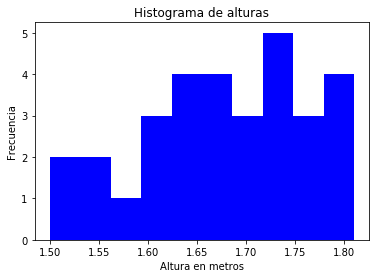

In [29]:
#histograma de alturas
plt.hist(alturas,10,facecolor='b')
plt.title("Histograma de alturas")
plt.xlabel("Altura en metros")
plt.ylabel("Frecuencia")

Se tienen 30 observaciones, de las cuales, hay una mayor frecuencia entre alturas de 1.7 a 1.75 m. COn esta cantidad de datos no podemos hacer conclusiones fuertes sobre la distribucion del fenotipo "altura", tan solo decir que la grafica esta un poco cargada en la derecha por lo que se observan mas alturas de 1.65 a 1.80 m.

Text(0, 0.5, 'Frecuencia')

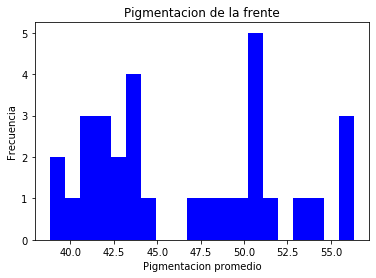

In [31]:
#histograma de pigmentacion de la frente
plt.hist(frenteavg,20,facecolor='b')
plt.title("Pigmentacion de la frente")
plt.xlabel("Pigmentacion promedio")
plt.ylabel("Frecuencia")

La pigmentacion promedio de la frente no tiene una clara distribucion. Sin embargo, podemos ver que el valor mas frecuente es el de 51 aunque muchas observaciones estan en el rango de 37.5 a 45.

Text(0, 0.5, 'Frecuencia')

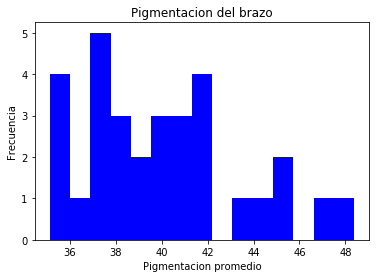

In [32]:
#histograma de pigmentacion del brazo
plt.hist(brazoavg,15,facecolor='b')
plt.title("Pigmentacion del brazo")
plt.xlabel("Pigmentacion promedio")
plt.ylabel("Frecuencia")

Este histograma parece estar sesgado a la izquierda, con valores pequeños más frecuentes. Esto hace sentido ya que se espera un menor impacto en el tono de piel causado por el sol dado reducido descubrimiento de este. 

In [17]:
# manera 0 eficiente de obtener listas que contengan...
#      para cada persona, para cada medicion, el promedio entre brazo y frente de ese no. de medicion 
#  i.e. [ persona1[ (br1+fr1)/2 ,..., (br5+fr5)/2 ] , ... , persona30[(br1+fr1)/2,...,(br5+fr5)/2]]

#saco el vector con todas las mediciones de pigm de frente
frente, c=[],1
for i in rows:
    if c >= 7 and c <= 11:
        frente.append(i[0])
    if (c-7)%16 == 0 or (c-8)%16 == 0 or (c-9)%16 == 0 or (c-10)%16 == 0 or (c-11)%16 == 0:
        frente.append(i[0])
    c=c+1
#print(c)
#print(frente)
#saco el vector con todas las mediciones de pigm de brazo
brazo, c=[],1
for i in rows:
    if c >= 12 and c <= 16:
        brazo.append(i[0])
    if (c-12)%16 == 0 or (c-13)%16 == 0 or (c-14)%16 == 0 or (c-15)%16 == 0 or (c-16)%16 == 0:
        brazo.append(i[0])
    c=c+1
#print(brazo)
#vector con promedio de mediciones: (frente+brazo)/2
brfr, c = [], 0
for i in brazo:
    brfr.append((i+frente[c])/2)
    c=c+1
#print(brfr)
# lo mismo pero separado en listas para cada persona
datospigm, persona, c = [], [],0
for i in brfr:
    if c >= 0 and c <=4:
        persona.append(i)
        c = c+1
    elif c > 4:
        datospigm.append(persona)
        persona = []
        c = 0
#print(datospigm)

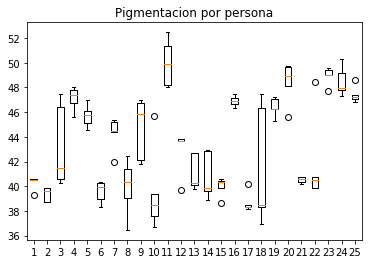

In [21]:
# boxplots de medidas de pigmentacion para cada persona
fig, ax = plt.subplots()
ax.set_title('Pigmentacion por persona')
ax.boxplot(datospigm)
plt.show()

Los boxplots de arriba nos habla sobre la variacion entre las medidas de pigmetacion en brazo y frente en conjunto, en el caso de variacion grnade mas extremo, tenemos que la persona 18, Christian, tiene un rango de valores entre ~37 y hasta ~47 con media cercana a 38. Tambien tenemos casos de poca variacion entre las medidas como Margareta, en la posicion 1 pero con un outlier.

In [25]:
# vectores de medicion de frente y brazo por persona
# todosfrente = [ persona1[med1,...,med5], ..., persona30[med1,...,med5] ]
todosfrente, perfrente, c = [], [], 0
for i in frente:
    if c >= 0 and c <= 4:
        perfrente.append(i)
        c+=1
    elif c > 4:
        todosfrente.append(perfrente)
        perfrente = []
        c = 0
#print(todosfrente)
# todosbrazo = [ persona1[med1,...,med5], ..., persona30[med1,...,med5] ]
todosbrazo, perbrazo, c = [], [], 0
for i in brazo:
    if c >= 0 and c <= 4:
        perbrazo.append(i)
        c+=1
    elif c > 4:
        todosbrazo.append(perbrazo)
        perbrazo = []
        c = 0
#print(todosbrazo)

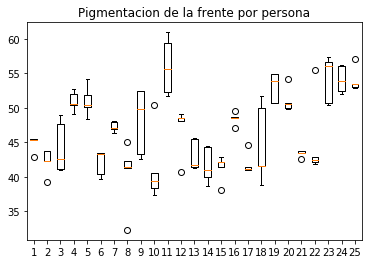

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Pigmentacion de la frente por persona')
ax1.boxplot(todosfrente)
plt.show()

Es razonable pensar que las mediciones de la frente pueden ser un tanto heterogeneas, debido a que diferentes partes de la frente se expongan distinto al sol, por ejemplo. Pero, salvo a algunas personas, la mayoria parece haber tenido una medicion parecida.

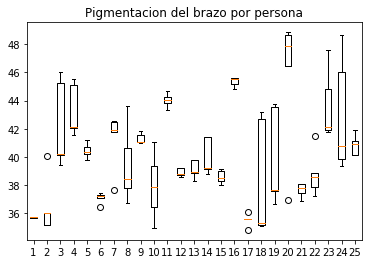

In [27]:
fig2, ax2 = plt.subplots()
ax2.set_title('Pigmentacion del brazo por persona')
ax2.boxplot(todosbrazo)
plt.show()

Por el contrario, tomamos la medida del brazo pensando que es poco afectado por el sol, y creo que tambien seria razonable pensar que la mayoria de estas mediciones serian parecidas, sin embargo, estas mediciones parecen variar mas entre si que las que se tomaron para la frente. Hay varias posibles respuestas, una es que si expongan la parte del brazo medida al sol para que se diferencie en el tono, tal vez tomaron la medicion de algun lunar o de la axila.